In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/collab projects/Regression Project - Industry Dataset/Hazard_train.csv')
df.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,83642,2,10,23,4,N,K,Y,B,D,E,2,H,B,10,0,A,K,N,52,14,N,8,C,2,37,1,11,2,Y,N,E,2,1
1,92530,6,3,18,2,B,H,N,B,B,D,8,L,B,10,3,A,B,N,39,14,Y,13,A,2,34,1,12,7,Y,N,C,3,3
2,86131,4,5,20,4,B,K,N,B,B,E,7,H,B,15,1,A,K,N,66,10,N,8,C,1,40,1,17,4,Y,N,D,1,1
3,88666,1,4,7,5,N,H,N,B,B,B,8,B,B,15,3,A,B,N,48,11,N,11,B,2,37,1,11,6,Y,N,D,2,1
4,11122,21,10,21,6,N,C,Y,B,C,D,12,L,B,10,1,A,I,N,42,11,N,11,A,2,40,1,6,6,N,N,D,5,5


In [ ]:
print(df.shape)

(40799, 34)


In [ ]:
cols = df.columns
predictors = df[cols[2:]]
target = df['Hazard']

In [ ]:
df.describe()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
count,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000,40799.000000
mean,50850.454276,4.009584,9.723645,12.849359,3.190691,7.025123,14.009902,1.582416,57.568641,12.410451,10.251403,1.947499,33.504620,1.031349,12.496973,4.489963,2.448344,3.482512
std,29282.641037,4.007785,5.170715,6.257502,1.742044,3.596619,4.649012,0.865121,23.461468,4.785406,4.845443,0.795249,5.830512,0.191676,7.313552,1.899386,1.257293,3.070911
min,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25596.500000,1.000000,6.000000,7.000000,2.000000,3.000000,10.000000,1.000000,40.000000,9.000000,6.000000,2.000000,31.000000,1.000000,6.000000,3.000000,2.000000,1.000000
50%,50784.000000,3.000000,9.000000,14.000000,3.000000,8.000000,15.000000,1.000000,55.000000,11.000000,10.000000,2.000000,34.000000,1.000000,14.000000,4.000000,2.000000,2.000000
75%,76198.500000,5.000000,14.000000,18.000000,4.000000,12.000000,20.000000,2.000000,77.000000,15.000000,14.000000,2.000000,40.000000,1.000000,18.000000,6.000000,3.000000,5.000000
max,101999.000000,69.000000,19.000000,24.000000,9.000000,12.000000,20.000000,4.000000,100.000000,39.000000,22.000000,7.000000,40.000000,3.000000,25.000000,7.000000,7.000000,12.000000


In [ ]:
objcol= df.select_dtypes(['object']).columns
objcol

Index(['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11',
       'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11',
       'T2_V12', 'T2_V13'],
      dtype='object')

In [ ]:
cutoff = df.shape[0] * 0.05
print("cutoff : ", cutoff)

cutoff :  2039.95


In [ ]:
for col in objcol:
    freqs=df[col].value_counts()
    selected_cats=freqs.index[freqs > cutoff]
    
    print(col)
    for cat in selected_cats:
        name=col+'_'+cat
        
        df[name]=(df[col]==cat).astype(int)
    del df[col]

T1_V4
T1_V5
T1_V6
T1_V7
T1_V8
T1_V9
T1_V11
T1_V12
T1_V15
T1_V16
T1_V17
T2_V3
T2_V5
T2_V11
T2_V12
T2_V13


In [ ]:
df.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15,T1_V4_N,T1_V4_B,T1_V4_C,T1_V4_W,T1_V4_E,T1_V5_K,T1_V5_A,T1_V5_H,T1_V5_C,T1_V5_I,T1_V5_B,T1_V6_N,T1_V6_Y,T1_V7_B,T1_V8_B,T1_V9_D,T1_V9_E,T1_V9_B,T1_V11_B,T1_V11_H,T1_V11_L,T1_V11_J,T1_V12_B,T1_V15_A,T1_V16_I,T1_V16_B,T1_V16_R,T1_V16_K,T1_V16_A,T1_V16_E,T1_V17_N,T1_V17_Y,T2_V3_N,T2_V3_Y,T2_V5_A,T2_V5_B,T2_V5_C,T2_V11_Y,T2_V11_N,T2_V12_N,T2_V12_Y,T2_V13_E,T2_V13_A,T2_V13_C,T2_V13_D
0,83642,2,10,23,4,2,10,0,52,14,8,2,37,1,11,2,2,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0
1,92530,6,3,18,2,8,10,3,39,14,13,2,34,1,12,7,3,3,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0
2,86131,4,5,20,4,7,15,1,66,10,8,1,40,1,17,4,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1
3,88666,1,4,7,5,8,15,3,48,11,11,2,37,1,11,6,2,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
4,11122,21,10,21,6,12,10,1,42,11,11,2,40,1,6,6,5,5,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
X = df[df.columns[2:]]
Y=pd.DataFrame()
Y['Hazard'] = df['Hazard']

In [ ]:
Y.columns

Index(['Hazard'], dtype='object')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
lambdas=np.linspace(1,100,100)
lm=Ridge(fit_intercept=True)
params= {
    'alpha':lambdas
}
ridgesearch=GridSearchCV(lm , param_grid=params , cv=10 ,n_jobs=-1,  scoring='neg_mean_absolute_error' ,  verbose=30)
ridgesearch.fit(X,Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,...,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             pre_dispatch='2*n_

In [ ]:
ridgesearch.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
report(ridgesearch.cv_results_,5)

Model with rank: 1
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 100.0}

Model with rank: 2
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 99.0}

Model with rank: 3
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 98.0}

Model with rank: 4
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 97.0}

Model with rank: 5
Mean validation score: -2.775 (std: 0.04312)
Parameters: {'alpha': 96.0}



In [ ]:
X.shape

(40799, 61)

In [ ]:
Y.shape

(40799, 1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
def predplotter(searchobj):
  cur_model = searchobj#.best_estimator_
  cur_model.fit(x_train, y_train)
  preds = cur_model.predict(x_test)
  plt.figure(figsize=(12, 6))
  plt.plot(x_test['T2_V1'], y_test, 'o')           # scatter plot showing actual data
  plt.plot(x_test['T2_V1'],preds , 'r', linewidth=2)   # regression line
  plt.xlabel('T2V1')
  plt.ylabel('predictions')
  plt.title('T2v1 vs predictions')
  plt.show()

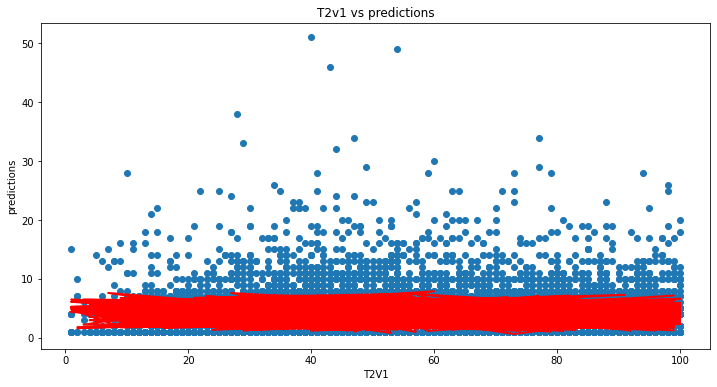

In [ ]:
predplotter(ridgesearch)


In [ ]:
dtreg = DecisionTreeRegressor(criterion='mae')

params ={'max_depth':[None,5,7,10,12,15],
            'min_samples_leaf':[5,10,30,50,100], 
            'min_samples_split':[2,5,10,15,20,50,70,100]}

dtree = RandomizedSearchCV(param_distributions = params, estimator = dtreg, cv =5,n_iter=10, verbose = 30,n_jobs=-1, scoring='neg_mean_absolute_error')

In [ ]:
dtree.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 24

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mae',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [ ]:
dtree.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
report(dtree.cv_results_,5)

Model with rank: 1
Mean validation score: -2.644 (std: 0.03087)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 30, 'max_depth': 5}

Model with rank: 2
Mean validation score: -2.646 (std: 0.03348)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 100, 'max_depth': 5}

Model with rank: 3
Mean validation score: -2.654 (std: 0.03037)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 30, 'max_depth': 10}

Model with rank: 4
Mean validation score: -2.654 (std: 0.03535)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 100, 'max_depth': 15}

Model with rank: 5
Mean validation score: -2.654 (std: 0.03280)
Parameters: {'min_samples_split': 50, 'min_samples_leaf': 100, 'max_depth': 12}



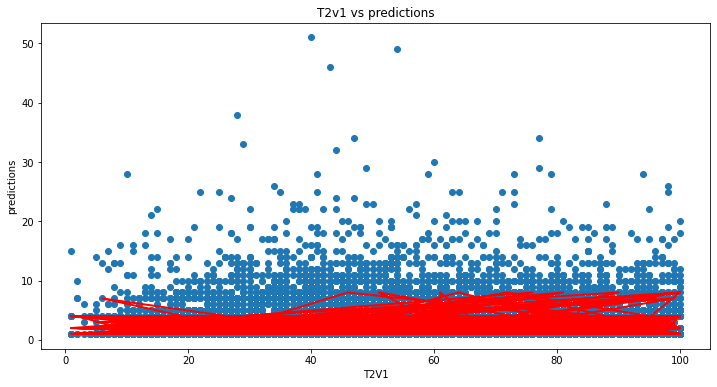

In [ ]:
predplotter(dtree)

In [ ]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(criterion='mae',  verbose=30, n_estimators=100, n_jobs=-1)

params ={"n_estimators":[500],
    'max_depth':[5,10,15],
            'min_samples_leaf':[5,10,30,50,100], 
            'min_samples_split':[2,5,10,15,20,50,70,100]
         }

rftree = RandomizedSearchCV(param_distributions = params, estimator = rfreg, cv =5,n_iter=1, verbose = 30, scoring='neg_mean_absolute_error')
rftree.fit(X,Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  14 tasks

Using ThreadingBackend as joblib.Parallel backend instead of LokyBackend as the latter does not provide shared memory semantics.


[Parallel(n_jobs=2)]: Done 204 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 205 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 206 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 207 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 208 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 209 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 210 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 211 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 212 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 213 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 214 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 215 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 216 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 219 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Do

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_depth=5, score=-2.614, total=209.4min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 209.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  14 tasks

In [ ]:
dir(rfreg)
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   39.9s
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:   40.1s remaining:  6.0min
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   44.6s remaining:  4.2min
[Parallel(n_jobs=20)]: Done   4 out of  20 | elapsed:   45.7s remaining:  3.0min
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:   45.9s remaining:  2.3min
[Parallel(n_jobs=20)]: Done   6 out of  20 | elapsed:  4.6min remaining: 10.7min
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:  4.6min remaining:  8.5min
[Parallel(n_jobs=20)]: Done   8 out of  20 | elapsed:  4.6min remaining:  6.9min
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:  4.6min remaining:  5.6min
[Parallel(n_jobs=20)]: Done  10 out of  20 | elapsed:  4.6min remaining:  4.6min
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:  5.8min remaining:  4.8min
[Parallel(n_jobs=20)]: Done  12 out of  20 | elapse

{'n_estimators': 500, 'objective': 'count:poisson'}
Model with rank: 1
Mean validation score: -2.726 (std: 0.03101)
Parameters: {'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 2
Mean validation score: -2.728 (std: 0.03076)
Parameters: {'n_estimators': 750, 'objective': 'count:poisson'}

Model with rank: 3
Mean validation score: -2.728 (std: 0.03214)
Parameters: {'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 4
Mean validation score: -2.731 (std: 0.03012)
Parameters: {'n_estimators': 1000, 'objective': 'count:poisson'}

None
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   40.8s
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:   41.4s remaining:  6.2min
[Parallel(n_jobs=20)]: Done   3 out of  20 | elapsed:   42.1s remaining:  4.0min
[Parallel(n_jobs=20)]: Done   4 out of  20 | elapsed:   42.5s remaining:  2.8min
[Parallel(n_jobs=20)]: Done   5 out of  20 | elapsed:   42.6s remaining:  2.1min
[Parallel(n_jobs=20)]: Done   6 out of  20 | elapsed:  2.2min remaining:  5.2min
[Parallel(n_jobs=20)]: Done   7 out of  20 | elapsed:  3.6min remaining:  6.8min
[Parallel(n_jobs=20)]: Done   8 out of  20 | elapsed:  3.6min remaining:  5.5min
[Parallel(n_jobs=20)]: Done   9 out of  20 | elapsed:  3.6min remaining:  4.5min
[Parallel(n_jobs=20)]: Done  10 out of  20 | elapsed:  3.6min remaining:  3.6min
[Parallel(n_jobs=20)]: Done  11 out of  20 | elapsed:  4.6min remaining:  3.8min
[Parallel(n_jobs=20)]: Done  12 out of  20 | elapse

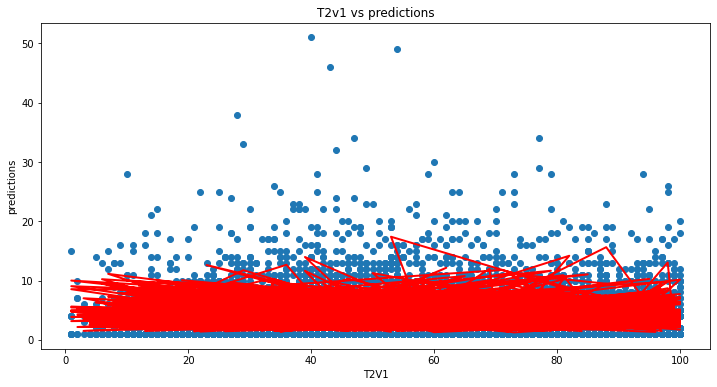

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

param_tuning = {
        #'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250, 500,750,1000],
        'objective': ['count:poisson']}

xgbsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch.fit(X,Y)
print(xgbsearch.best_params_)
print(report(xgbsearch.cv_results_,5))
predplotter(xgbsearch)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   54.8s
[Parallel(n_jobs=20)]: Done   3 out of  30 | elapsed:   55.5s remaining:  8.3min
[Parallel(n_jobs=20)]: Done   5 out of  30 | elapsed:   56.9s remaining:  4.7min
[Parallel(n_jobs=20)]: Done   7 out of  30 | elapsed:   58.4s remaining:  3.2min
[Parallel(n_jobs=20)]: Done   9 out of  30 | elapsed:  3.5min remaining:  8.1min
[Parallel(n_jobs=20)]: Done  11 out of  30 | elapsed:  3.5min remaining:  6.0min
[Parallel(n_jobs=20)]: Done  13 out of  30 | elapsed:  3.5min remaining:  4.6min
[Parallel(n_jobs=20)]: Done  15 out of  30 | elapsed:  3.5min remaining:  3.5min
[Parallel(n_jobs=20)]: Done  17 out of  30 | elapsed:  3.5min remaining:  2.7min
[Parallel(n_jobs=20)]: Done  19 out of  30 | elapsed:  3.6min remaining:  2.1min
[Parallel(n_jobs=20)]: Done  21 out of  30 | elapsed:  3.6min remaining:  1.5min
[Parallel(n_jobs=20)]: Done  23 out of  30 | elapse

{'learning_rate': 0.01, 'n_estimators': 250, 'objective': 'count:poisson'}
Model with rank: 1
Mean validation score: -2.704 (std: 0.02992)
Parameters: {'learning_rate': 0.01, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 2
Mean validation score: -2.728 (std: 0.03214)
Parameters: {'learning_rate': 0.1, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 3
Mean validation score: -2.729 (std: 0.03177)
Parameters: {'learning_rate': 0.05, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 4
Mean validation score: -2.736 (std: 0.03340)
Parameters: {'learning_rate': 0.25, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 5
Mean validation score: -2.778 (std: 0.03172)
Parameters: {'learning_rate': 0.5, 'n_estimators': 250, 'objective': 'count:poisson'}

None
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   30.2s
[Parallel(n_jobs=20)]: Done   3 out of  30 | elapsed:   30.9s remaining:  4.6min
[Parallel(n_jobs=20)]: Done   5 out of  30 | elapsed:   32.5s remaining:  2.7min
[Parallel(n_jobs=20)]: Done   7 out of  30 | elapsed:  2.5min remaining:  8.3min
[Parallel(n_jobs=20)]: Done   9 out of  30 | elapsed:  2.5min remaining:  5.9min
[Parallel(n_jobs=20)]: Done  11 out of  30 | elapsed:  2.5min remaining:  4.4min
[Parallel(n_jobs=20)]: Done  13 out of  30 | elapsed:  2.6min remaining:  3.3min
[Parallel(n_jobs=20)]: Done  15 out of  30 | elapsed:  2.6min remaining:  2.6min
[Parallel(n_jobs=20)]: Done  17 out of  30 | elapsed:  2.6min remaining:  2.0min
[Parallel(n_jobs=20)]: Done  19 out of  30 | elapsed:  2.6min remaining:  1.5min
[Parallel(n_jobs=20)]: Done  21 out of  30 | elapsed:  2.6min remaining:  1.1min
[Parallel(n_jobs=20)]: Done  23 out of  30 | elapse

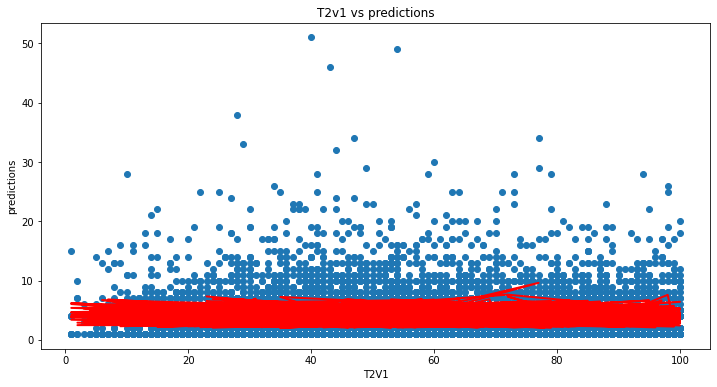

In [ ]:
param_tuning = {
        'learning_rate': [0.01, 0.05,0.1,0.25, 0.5, 0.7],
        #'max_depth': [3, 5, 7, 10],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250],
        'objective': ['count:poisson']}

xgbsearch2 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch2.fit(X,Y)
print(xgbsearch2.best_params_)
print(report(xgbsearch2.cv_results_,5))
predplotter(xgbsearch2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   46.2s
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:   46.7s
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:   46.9s
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:   47.0s
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:   47.9s
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed:  3.5min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed:  

{'learning_rate': 0.005, 'n_estimators': 250, 'objective': 'count:poisson'}
Model with rank: 1
Mean validation score: -2.664 (std: 0.03404)
Parameters: {'learning_rate': 0.005, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 2
Mean validation score: -2.670 (std: 0.03584)
Parameters: {'learning_rate': 0.002, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 3
Mean validation score: -2.675 (std: 0.03198)
Parameters: {'learning_rate': 0.007, 'n_estimators': 250, 'objective': 'count:poisson'}

Model with rank: 4
Mean validation score: -2.704 (std: 0.02974)
Parameters: {'learning_rate': 0.005, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 5
Mean validation score: -2.704 (std: 0.02992)
Parameters: {'learning_rate': 0.01, 'n_estimators': 250, 'objective': 'count:poisson'}

None
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:   30.5s
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:   30.7s
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:   30.9s
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:   31.3s
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:   32.0s
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed:  

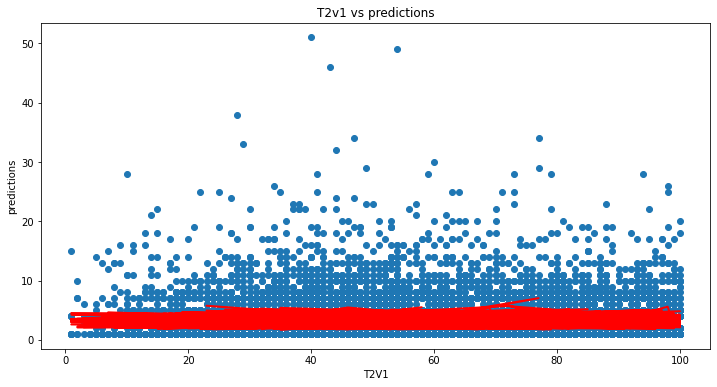

In [ ]:
param_tuning = {
        'learning_rate': [0.001,0.002, 0.005,0.007,0.01,0.02],
        #'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 250,500],
        'objective': ['count:poisson']}

xgbsearch3 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch3.fit(X,Y)
print(xgbsearch3.best_params_)
print(report(xgbsearch3.cv_results_,5))
predplotter(xgbsearch3)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:  1.5min
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  9.9min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  9.9min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed:  9.9min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed: 10.0min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 10.0min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed: 14.6min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed: 14.7min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed: 14.7min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed: 14.7min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed: 1

{'learning_rate': 0.002, 'max_depth': 7, 'n_estimators': 500, 'objective': 'count:poisson'}
Model with rank: 1
Mean validation score: -2.628 (std: 0.03566)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 2
Mean validation score: -2.629 (std: 0.03704)
Parameters: {'learning_rate': 0.002, 'max_depth': 10, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 3
Mean validation score: -2.641 (std: 0.03708)
Parameters: {'learning_rate': 0.002, 'max_depth': 12, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 4
Mean validation score: -2.644 (std: 0.03566)
Parameters: {'learning_rate': 0.002, 'max_depth': 5, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 5
Mean validation score: -2.658 (std: 0.03593)
Parameters: {'learning_rate': 0.005, 'max_depth': 12, 'n_estimators': 500, 'objective': 'count:poisson'}

None
Fitting 5 folds for each of 12 candidates, totalling 60

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  5.1min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  5.2min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed: 10.0min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed: 10.0min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 10.0min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed: 14.4min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed: 1

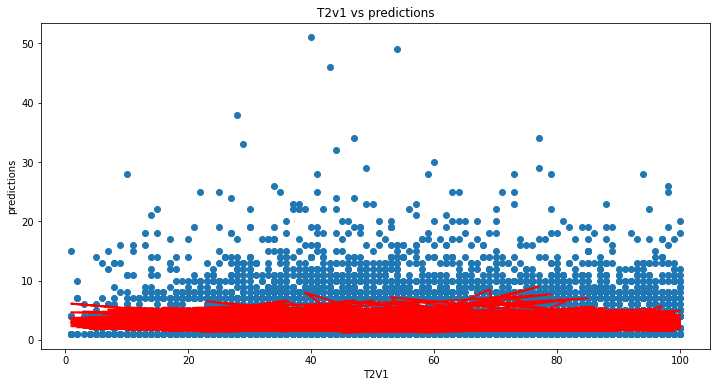

In [ ]:
param_tuning = {
        'learning_rate': [0.002, 0.005],
        'max_depth':  [3, 5, 7, 10,12,15],
        #'min_child_weight': [1, 3, 5],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  6.1min
[Parallel(n_jobs=20)]: Done   2 out of  35 | elapsed:  6.1min remaining: 101.2min
[Parallel(n_jobs=20)]: Done   4 out of  35 | elapsed:  6.2min remaining: 48.1min
[Parallel(n_jobs=20)]: Done   6 out of  35 | elapsed:  6.3min remaining: 30.5min
[Parallel(n_jobs=20)]: Done   8 out of  35 | elapsed: 20.3min remaining: 68.4min
[Parallel(n_jobs=20)]: Done  10 out of  35 | elapsed: 20.4min remaining: 50.9min
[Parallel(n_jobs=20)]: Done  12 out of  35 | elapsed: 20.5min remaining: 39.2min
[Parallel(n_jobs=20)]: Done  14 out of  35 | elapsed: 20.7min remaining: 31.0min
[Parallel(n_jobs=20)]: Done  16 out of  35 | elapsed: 20.7min remaining: 24.6min
[Parallel(n_jobs=20)]: Done  18 out of  35 | elapsed: 20.7min remaining: 19.5min
[Parallel(n_jobs=20)]: Done  20 out of  35 | elapsed: 20.7min remaining: 15.5min
[Parallel(n_jobs=20)]: Done  22 out of  35 | elaps

{'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 50, 'n_estimators': 500, 'objective': 'count:poisson'}
Model with rank: 1
Mean validation score: -2.627 (std: 0.03549)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 50, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 2
Mean validation score: -2.628 (std: 0.03534)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 3
Mean validation score: -2.628 (std: 0.03569)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 4
Mean validation score: -2.628 (std: 0.03489)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 100, 'n_estimators': 500, 'objective': 'count:poisson'}

Model with rank: 5
Mean validation score: -2.628 (std: 0.03505)
Parameters: {'learning_rate': 0.002, 'max_depth'

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  4.7min
[Parallel(n_jobs=20)]: Done   2 out of  35 | elapsed:  4.7min remaining: 77.7min
[Parallel(n_jobs=20)]: Done   4 out of  35 | elapsed:  4.7min remaining: 36.8min
[Parallel(n_jobs=20)]: Done   6 out of  35 | elapsed:  4.8min remaining: 23.4min
[Parallel(n_jobs=20)]: Done   8 out of  35 | elapsed: 15.9min remaining: 53.8min
[Parallel(n_jobs=20)]: Done  10 out of  35 | elapsed: 16.1min remaining: 40.2min
[Parallel(n_jobs=20)]: Done  12 out of  35 | elapsed: 16.2min remaining: 31.0min
[Parallel(n_jobs=20)]: Done  14 out of  35 | elapsed: 16.5min remaining: 24.8min
[Parallel(n_jobs=20)]: Done  16 out of  35 | elapsed: 16.6min remaining: 19.7min
[Parallel(n_jobs=20)]: Done  18 out of  35 | elapsed: 16.6min remaining: 15.7min
[Parallel(n_jobs=20)]: Done  20 out of  35 | elapsed: 16.9min remaining: 12.7min
[Parallel(n_jobs=20)]: Done  22 out of  35 | elapse

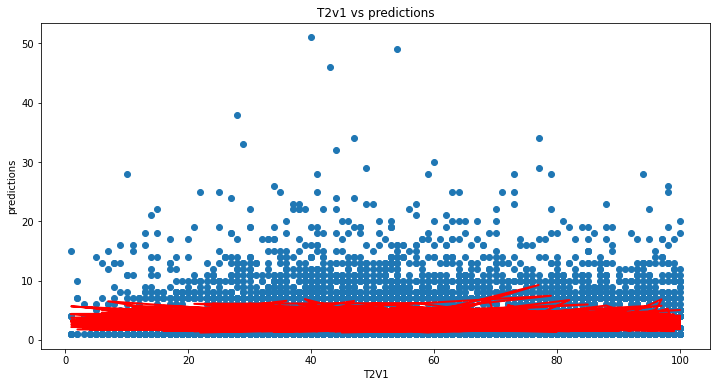

In [ ]:
param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 5,10,15,50,100,150,200],
        #'subsample': [0.5, 0.7],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  4.6min
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:  4.7min
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:  4.7min
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:  4.8min
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:  4.8min
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  7.1min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  7.1min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed:  7.3min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed: 18.2min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 18.2min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed: 18.5min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed: 19.2min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed: 19.3min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed: 22.4min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed: 2

{'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}
Model with rank: 1
Mean validation score: -2.625 (std: 0.03509)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 2
Mean validation score: -2.625 (std: 0.03533)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 30, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 3
Mean validation score: -2.625 (std: 0.03509)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 50, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 4
Mean validation score: -2.625 (std: 0.03415)
Parameters: {'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 30, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.5}

Model with rank: 5
Mea

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:  3.1min
[Parallel(n_jobs=20)]: Done   3 tasks      | elapsed:  3.1min
[Parallel(n_jobs=20)]: Done   4 tasks      | elapsed:  3.1min
[Parallel(n_jobs=20)]: Done   5 tasks      | elapsed:  3.2min
[Parallel(n_jobs=20)]: Done   6 tasks      | elapsed:  5.3min
[Parallel(n_jobs=20)]: Done   7 tasks      | elapsed:  5.3min
[Parallel(n_jobs=20)]: Done   8 tasks      | elapsed: 13.9min
[Parallel(n_jobs=20)]: Done   9 tasks      | elapsed: 13.9min
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  11 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  12 tasks      | elapsed: 14.3min
[Parallel(n_jobs=20)]: Done  13 tasks      | elapsed: 16.7min
[Parallel(n_jobs=20)]: Done  14 tasks      | elapsed: 16.8min
[Parallel(n_jobs=20)]: Done  15 tasks      | elapsed: 1

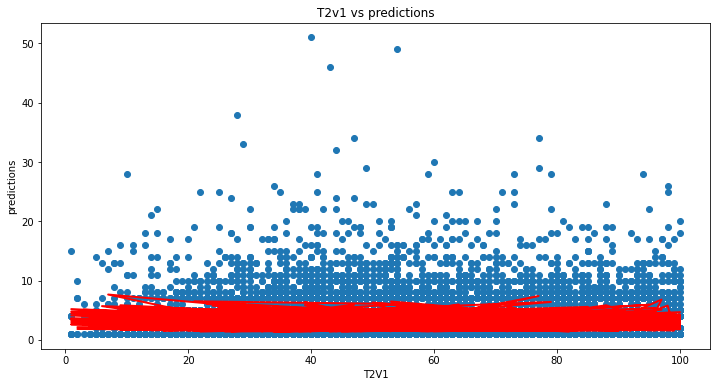

In [ ]:

param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15,30,50],
        'subsample': [0.1,0.2,0.5, 0.7,0.9],
        #'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.3min
[Parallel(n_jobs=20)]: Done   2 out of  25 | elapsed:  1.3min remaining: 15.4min
[Parallel(n_jobs=20)]: Done   3 out of  25 | elapsed:  1.3min remaining:  9.9min
[Parallel(n_jobs=20)]: Done   4 out of  25 | elapsed:  1.4min remaining:  7.2min
[Parallel(n_jobs=20)]: Done   5 out of  25 | elapsed:  1.4min remaining:  5.6min
[Parallel(n_jobs=20)]: Done   6 out of  25 | elapsed:  8.7min remaining: 27.4min
[Parallel(n_jobs=20)]: Done   7 out of  25 | elapsed:  8.7min remaining: 22.3min
[Parallel(n_jobs=20)]: Done   8 out of  25 | elapsed:  8.7min remaining: 18.4min
[Parallel(n_jobs=20)]: Done   9 out of  25 | elapsed:  8.7min remaining: 15.4min
[Parallel(n_jobs=20)]: Done  10 out of  25 | elapsed:  8.7min remaining: 13.0min
[Parallel(n_jobs=20)]: Done  11 out of  25 | elapsed: 12.3min remaining: 15.7min
[Parallel(n_jobs=20)]: Done  12 out of  25 | elapse

{'colsample_bytree': 0.9, 'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}
Model with rank: 1
Mean validation score: -2.626 (std: 0.03495)
Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 2
Mean validation score: -2.628 (std: 0.03472)
Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 3
Mean validation score: -2.632 (std: 0.03502)
Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.002, 'max_depth': 7, 'min_child_weight': 15, 'n_estimators': 500, 'objective': 'count:poisson', 'subsample': 0.7}

Model with rank: 4
Mean validation score: -2.656 (std: 0.03512)
Parameters: {'colsample_bytree': 0.2, 'learning_rate': 0.002, 'max_de

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=20)]: Done   2 out of  25 | elapsed:  1.2min remaining: 13.5min
[Parallel(n_jobs=20)]: Done   3 out of  25 | elapsed:  1.2min remaining:  8.6min
[Parallel(n_jobs=20)]: Done   4 out of  25 | elapsed:  1.2min remaining:  6.2min
[Parallel(n_jobs=20)]: Done   5 out of  25 | elapsed:  1.2min remaining:  4.8min
[Parallel(n_jobs=20)]: Done   6 out of  25 | elapsed:  3.0min remaining:  9.5min
[Parallel(n_jobs=20)]: Done   7 out of  25 | elapsed:  6.6min remaining: 17.1min
[Parallel(n_jobs=20)]: Done   8 out of  25 | elapsed:  6.7min remaining: 14.1min
[Parallel(n_jobs=20)]: Done   9 out of  25 | elapsed:  6.7min remaining: 11.8min
[Parallel(n_jobs=20)]: Done  10 out of  25 | elapsed:  6.7min remaining: 10.0min
[Parallel(n_jobs=20)]: Done  11 out of  25 | elapsed:  9.5min remaining: 12.1min
[Parallel(n_jobs=20)]: Done  12 out of  25 | elapse

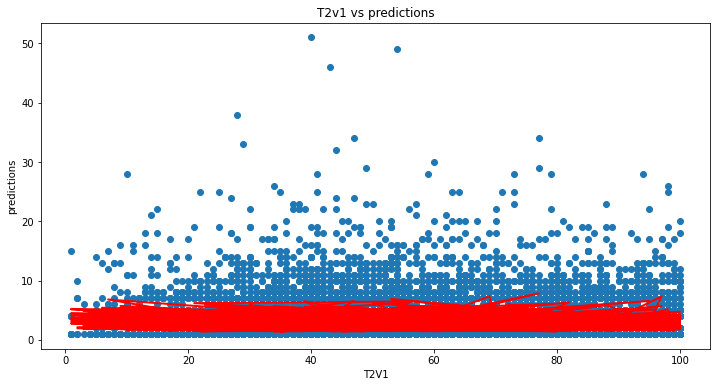

In [ ]:


param_tuning = {
        'learning_rate': [0.002],
        'max_depth':  [ 7],
        'min_child_weight': [ 15],
        'subsample': [0.7],
        'colsample_bytree': [0.1,0.2,0.5, 0.7,0.9],
        'n_estimators' : [ 500],
        'objective': ['count:poisson']}

xgbsearch4 = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = 20,
                           verbose = 30)

xgbsearch4.fit(X,Y)
print(xgbsearch4.best_params_)
print(report(xgbsearch4.cv_results_,5))
predplotter(xgbsearch4)